# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; Jacob gross.</p>
# <p style="text-align: right;"> &#9989; Jacob-Gross04</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, March 29th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will also be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/Jacob-Gross04/cmse202-s24-turnin-5-.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


---
# Part 2: Loading the datasets (11 points)

In Parts 2-4, you will be working with the world happiness report datasets that are available at https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors.

Note that while Parts 3 and 4 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3 or 4. To get started on Part 2, **you'll need to download the following files**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv`

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above two CSV files in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

In [2]:
!curl https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10805  100 10805    0     0  63623      0 --:--:-- --:--:-- --:--:-- 63934


In [3]:
!curl https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10139  100 10139    0     0  40343      0 --:--:-- --:--:-- --:--:-- 40394


``` bash
!curl https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv -O
!curl https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv -O
```

In [1]:
import pandas as pd

&#9989;  **Question 2.2 (4 points)**: Next, load the data in both files into different Pandas DataFrames and display the first and last 5 rows for each frame. 

In [2]:
# Put your code here
data1 = pd.read_csv("WHR_2022.csv")
data2 = pd.read_csv("WHR_2023.csv")

data1.head(n=5)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,Western Europe,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
data1.tail(n=5)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
141,Botswana,Sub-Saharan Africa,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,Middle East and North Africa,2.955,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,South Asia,2.404,0.758,0.000,0.289,0.000,0.089,0.005


In [4]:
data2.head(n=5)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [8]:
data2.tail(n=5)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027
136,Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [3]:
# Put your code here
data1_dropped = data1.dropna()
data2_dropped = data2.dropna()

print(len(data1), len(data1_dropped))
print(len(data2), len(data2_dropped))

data1 = data1.dropna()
data2 = data2.dropna()

146 146
137 136


&#9989;  **Question 2.4 (3 points)**: Lets do a bit of data analysis with the pandas frames. Display the countries with the top 3% scores (round the number of countries above to an integer) in the `happiness_score` column for 2022 and 2023. Are the countries different between the years?

In [4]:
# Put your code here
max1 = data1["happiness_score"].max()
max2 = data2["happiness_score"].max()

top3_1 = 0.97*max1
top3_2 = 0.97*max2

data1[data1["happiness_score"] >= top3_1].head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532


In [5]:
data2[data2["happiness_score"] >= top3_2].head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525


<font size=6 color="#009600">&#9998;</font> Surprisingly they are not different between the years

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear Regression (30 points)

In this part, we'll perform some one-variable linear regression analysis on the world happiness data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `happiness_score` using the `healthy_life_expectancy` column separately for 2022 and 2023 and **display the results summaries** for both years. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [6]:
import statsmodels.api as sm

In [7]:
# Put your code here
# 2022

x_with_cnst = sm.add_constant(data1["healthy_life_expectancy"])
model = sm.OLS(data1["happiness_score"], x_with_cnst)
results = model.fit()
# print("Intercept and slope are:", results.params)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.32e-26
Time:                        17:06:52   Log-Likelihood:                -160.86
No. Observations:                 146   AIC:                             325.7
Df Residuals:                     144   BIC:                             331.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [8]:
# 2023

x_with_cnst2 = sm.add_constant(data2["healthy_life_expectancy"])
model2 = sm.OLS(data2["happiness_score"], x_with_cnst2)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     168.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.71e-25
Time:                        17:06:53   Log-Likelihood:                -155.18
No. Observations:                 136   AIC:                             314.4
Df Residuals:                     134   BIC:                             320.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

&#9989;  **Question 3.2 (6 points)**: Answer the following questions: 

1. What were the equations of the best fit lines for 2022 and 2023? 

2. Are the slopes and intercepts of the two fitted lines identical (between the 2 years)? Would you use the 2022 model to predict for 2023?

3. Based on the R-squared values for the two cases, how do you think the models fit the data?

In [9]:
#3.2.1 
print("Intercept and slope for 2022 are:", results.params[0],  results.params[1])
print("Intercept and slope for 2023 are:", results2.params[0], results2.params[1])

Intercept and slope for 2022 are: 2.8791288599040974 4.562568636192633
Intercept and slope for 2023 are: 3.550200973541236 5.446117823260888


/tmp/ipykernel_2438515/792953552.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept and slope for 2022 are:", results.params[0],  results.params[1])
/tmp/ipykernel_2438515/792953552.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept and slope for 2023 are:", results2.params[0], results2.params[1])


In [10]:
#3.2.3
print("2022 model:",results.rsquared_adj)
print("2023 model:",results2.rsquared_adj)

2022 model: 0.5448465639507678
2023 model: 0.5542580337099965


<font size=+3>&#9998;</font> 1) The equations of best fit from 2022 and 2023 are y = 4.562569x + 2.879129, and y = 5.446118x + 3.550201 respectively

2) The slopes and intercepts are not identical between the years therefore I would not use the 2022 model to predict the 2023 data as it would be off by more than 1 happiness score
3) The 2023 model fits the data better as shown by its higher adjusted r-squared value
   
   

&#9989;  **Question 3.3 (6 points)**: Now make scatter plots of `happiness_score` (x-axis) vs. `healthy_life_expectancy` (on y-axis) for 2022 and 2023 on the same plot. Use different colors for the different years. Also plot the best fit lines on the same plot with same colors as the corresponding scatter plots. Label the axes, and add a legend, and give the plot a title.

/tmp/ipykernel_2438515/345745396.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = results.params[1]* data1["healthy_life_expectancy"] + results.params[0]
/tmp/ipykernel_2438515/345745396.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y2 = results2.params[1]* data2["healthy_life_expectancy"] + results2.params[0]


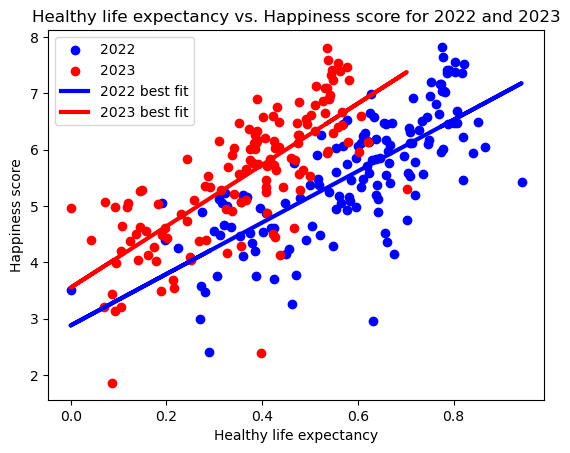

In [11]:
# Put your code here
import matplotlib.pyplot as plt

plt.scatter(data1["healthy_life_expectancy"], data1["happiness_score"], color = "blue", label = "2022")
plt.scatter(data2["healthy_life_expectancy"], data2["happiness_score"], color = "red", label = "2023")

y = results.params[1]* data1["healthy_life_expectancy"] + results.params[0]
y2 = results2.params[1]* data2["healthy_life_expectancy"] + results2.params[0]

plt.plot(data1["healthy_life_expectancy"], y, label = "2022 best fit", color = "blue", linewidth = 3)
plt.plot(data2["healthy_life_expectancy"], y2, label = "2023 best fit", color = "red", linewidth = 3)

plt.legend()
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness score")
plt.title("Healthy life expectancy vs. Happiness score for 2022 and 2023")
plt.show()


&#9989;  **Question 3.4 (2 points)**: In which year are the happiness score predictions generally better?

<font size=+3>&#9998;</font> The year with the better happiness score is 2023 outlined by a larger intercept and slope

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fits. Make sure to create a large enough figure so that everything is easily visible. Make separate plots for 2022 and 2023.

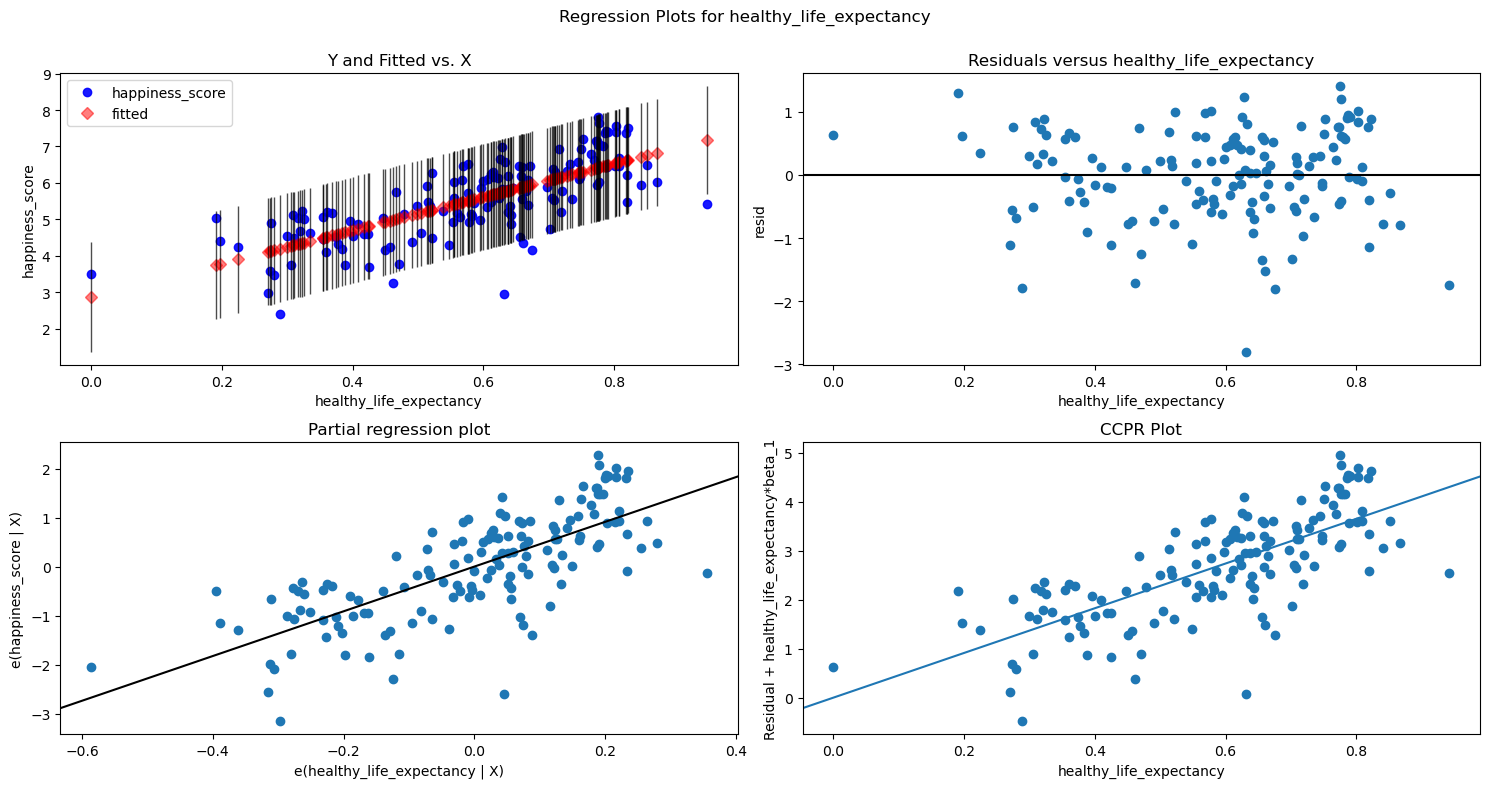

In [12]:
# Put code here.
#2022
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "healthy_life_expectancy", fig=fig)

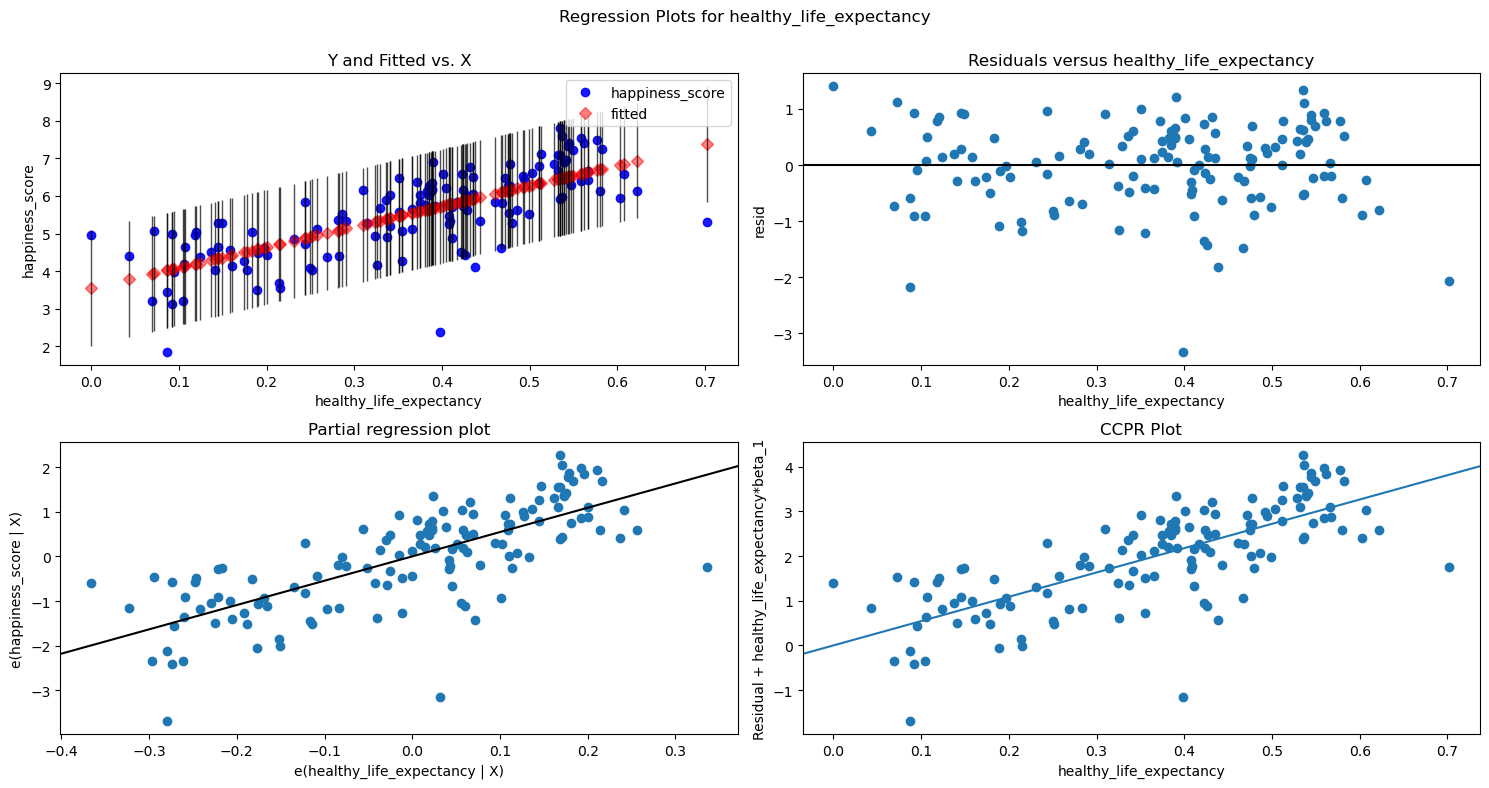

In [23]:
#2023
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results2, "healthy_life_expectancy", fig=fig)

&#9989;  **Question 3.6 (6 points)**: Lets try doing the model fitting again for 2022 and 2023 but only using countries in the `region` column labeled `Western Europe`. Using the `OLS` method in `statsmodels`, perform linear regression to predict `happiness score` based on `healthy_life_expectancy` using only countries in `Western Europe` `region`. Make sure to give the objects and variables different names for this part than the previous part. How do the results compare to Question 3.1? Discuss or compare briefly the observations. You may look at the R-squared values, etc.

In [13]:
# Put your code here
data1_masked = data1[data1["region"] == "Western Europe"]
data2_masked = data2[data2["region"] == "Western Europe"]

data2_masked.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520


In [14]:
#2022
x_with_cnst_masked = sm.add_constant(data1_masked["healthy_life_expectancy"])
model_masked = sm.OLS(data1_masked["happiness_score"], x_with_cnst_masked)
results_masked = model_masked.fit()

#2023
x_with_cnst2_masked = sm.add_constant(data2_masked["healthy_life_expectancy"])
model2_masked = sm.OLS(data2_masked["happiness_score"], x_with_cnst2_masked)
results2_masked = model2_masked.fit()

/tmp/ipykernel_2438515/1806675895.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_masked = results_masked.params[1]* data1_masked["healthy_life_expectancy"] + results_masked.params[0]
/tmp/ipykernel_2438515/1806675895.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y2_masked = results2_masked.params[1]* data2_masked["healthy_life_expectancy"] + results2_masked.params[0]


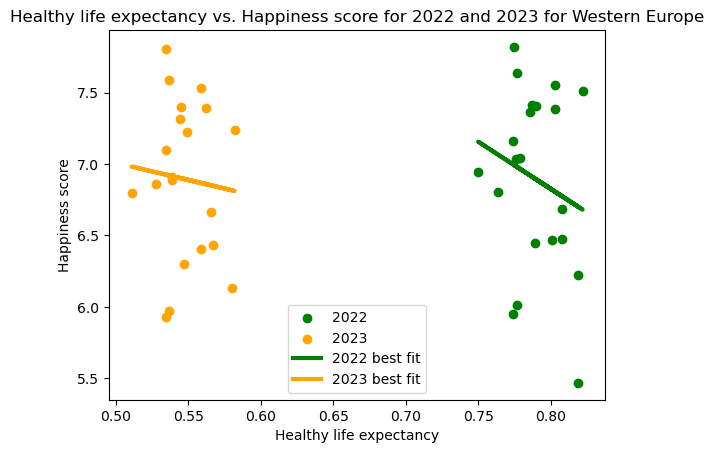

In [15]:
plt.scatter(data1_masked["healthy_life_expectancy"], data1_masked["happiness_score"], color = "green", label = "2022")
plt.scatter(data2_masked["healthy_life_expectancy"], data2_masked["happiness_score"], color = "orange", label = "2023")

y_masked = results_masked.params[1]* data1_masked["healthy_life_expectancy"] + results_masked.params[0]
y2_masked = results2_masked.params[1]* data2_masked["healthy_life_expectancy"] + results2_masked.params[0]

plt.plot(data1_masked["healthy_life_expectancy"], y_masked, label = "2022 best fit", color = "green", linewidth = 3)
plt.plot(data2_masked["healthy_life_expectancy"], y2_masked, label = "2023 best fit", color = "orange", linewidth = 3)

plt.legend()
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness score")
plt.title("Healthy life expectancy vs. Happiness score for 2022 and 2023 for Western Europe")
plt.show()

In [16]:
print("2022 model:",results_masked.rsquared_adj)
print("2023 model:",results2_masked.rsquared_adj)

2022 model: -0.010048417194376436
2023 model: -0.0493758508259865


<font size=+3>&#9998;</font> At first it was alarming to see negative r-squared values but that just means the data is negatively correlated. The 2023 model is slightly closer to -1 so it is a better fit. I was suprised to see from the graph that the years differed so much in life expectancy, and that happiness went down as life expectancy went up for both years.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to do predictions.

&#9989;  **Question 4.1 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `happiness_score` based on `gdp_per_capita`, `healthy_life_expectancy`, `freedom_to_make_life_choices`, and `generosity`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit models to both the 2022 and 2023 data and display summaries of both results.

In [17]:
# Put your code here
#2022
otherdata1 = data1.drop(columns = ["country", "region", "happiness_score", "social_support", "perceptions_of_corruption"])
x_with_cnst3 = sm.add_constant(otherdata1)
model3 = sm.OLS(data1["happiness_score"], x_with_cnst3 )
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           9.94e-38
Time:                        17:07:04   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6786      0.223      7.528      0.000       1.238       2.119
gdp_per_capita                   1.0653      0.208      5.123      0.000       0.654       1.476
healthy_life_expectancy          1.7728      0.480      3.694      0.000       0.824       2.722
freedom_to_make_life_choices     2.1722      0.394      5.515      0.000       1.394       2.951
generosity                       1.4235      0.622      2.288      0.024       0.194       2.653
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.395
Skew:                          -0.776   Prob(JB):                     0.000275
Kurtosis:                       3.533   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#2023
otherdata2 = data2.drop(columns = ["country", "region", "happiness_score", "social_support", "perceptions_of_corruption"])
x_with_cnst4 = sm.add_constant(otherdata2)
model4 = sm.OLS(data2["happiness_score"], x_with_cnst4 )
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     103.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.19e-39
Time:                        17:07:06   Log-Likelihood:                -113.50
No. Observations:                 136   AIC:                             237.0
Df Residuals:                     131   BIC:                             251.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6417      0.229      7.181      0.000       1.189       2.094
gdp_per_capita                   1.1201      0.213      5.259      0.000       0.699       1.541
healthy_life_expectancy          1.8733      0.573      3.270      0.001       0.740       3.007
freedom_to_make_life_choices     2.6733      0.381      7.018      0.000       1.920       3.427
generosity                       1.2924      0.677      1.909      0.058      -0.047       2.632
==============================================================================
Omnibus:                       11.839   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.825
Skew:                          -0.566   Prob(JB):                     0.000995
Kurtosis:                       4.076   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Compared to Question 3.1, are the fits better in Question 4.1? Answer based on e.g., R-squared and Adjusted R-squared values.

2. For each of the features for the year 2023, specify if it is statistically significant or not. Use a p-value threshold of 0.05.

<font size=+3>&#9998;</font> 1) This model better fits the data because both of the r-squared values are higher. This makes sense because we are giving more variables to fit. 

2) The features that are significant are GDP per capita, healthy life expectancy, and freedom to make life choices

&#9989;  **Question 4.3 (2 points)**: Perform the multivariable linear regression for 2023, but this time with only the **most significant features** (p-values less than 0.05). Display the summary of these results.

In [19]:
# Put your code here
#2023
otherdata3 = data2.drop(columns = ["country", "region", "happiness_score", "social_support", "perceptions_of_corruption", "generosity"])
x_with_cnst5 = sm.add_constant(otherdata3)
model5 = sm.OLS(data2["happiness_score"], x_with_cnst5 )
results5 = model5.fit()

results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     134.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           5.61e-40
Time:                        17:07:08   Log-Likelihood:                -115.37
No. Observations:                 136   AIC:                             238.7
Df Residuals:                     132   BIC:                             250.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8216      0.210      8.660      0.000       1.406       2.238
gdp_per_capita                   1.0597      0.213      4.982      0.000       0.639       1.481
healthy_life_expectancy          1.8506      0.578      3.199      0.002       0.706       2.995
freedom_to_make_life_choices     2.8695      0.370      7.746      0.000       2.137       3.602
==============================================================================
Omnibus:                       13.439   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.651
Skew:                          -0.601   Prob(JB):                     0.000242
Kurtosis:                       4.221   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.4 (2 points)**: How much better/worse is the reduced model compared to the original model? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> Both the r-squared value and adjusted r-squared value both went down slightly so the model is slightly worse, but now all the data is statistically significant

&#9989;  **Question 4.5 (3 points)**: Create three `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your reduced model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

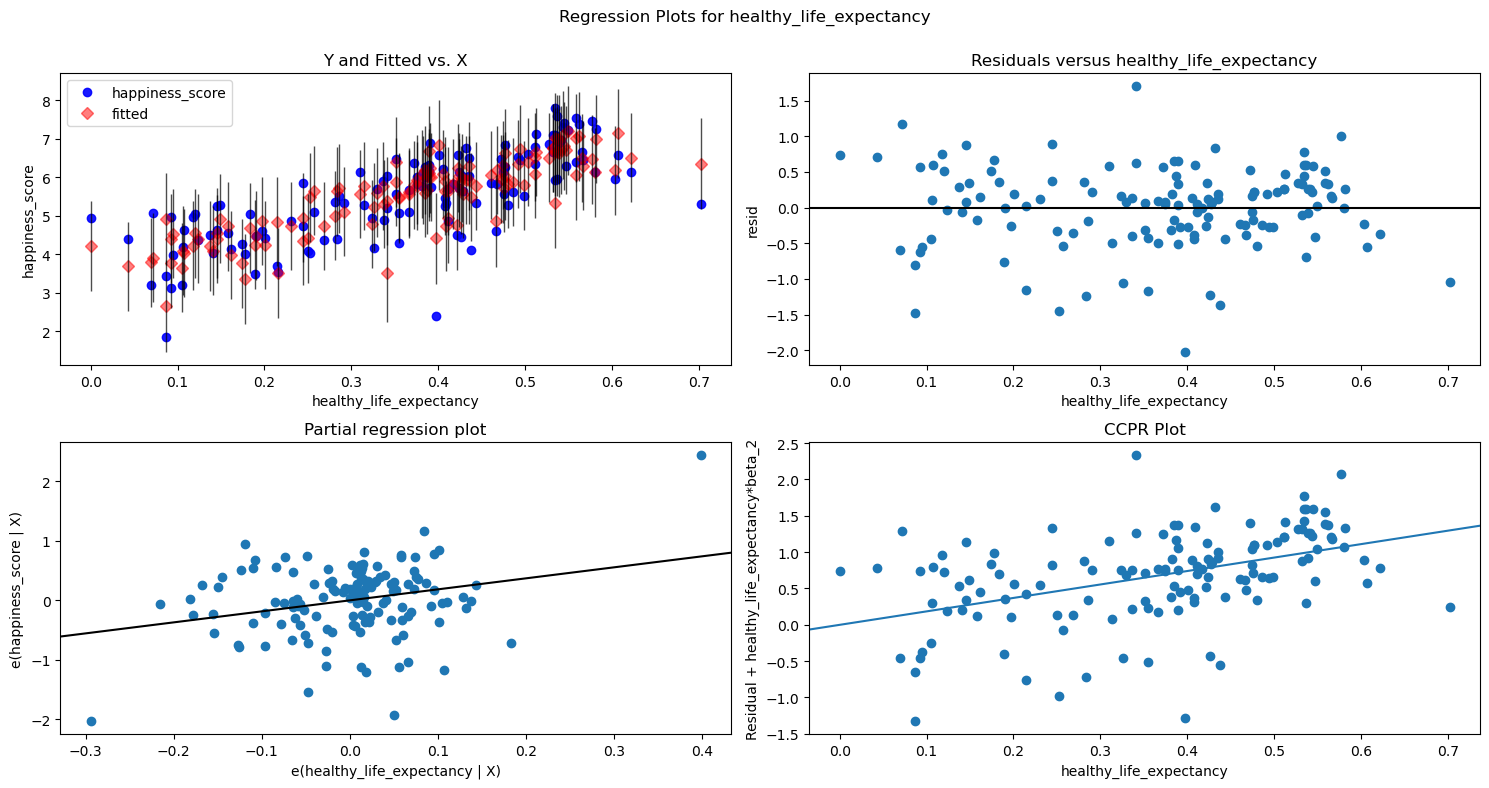

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results5, "healthy_life_expectancy", fig=fig)

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results5, "gdp_per_capita", fig=fig)

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results5, "healthy_life_expectancy", fig=fig)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a person has diabetes or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis?select=diabetes.csv. 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [ ]:
# Put your code here


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Outcome` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of just the columns `Glucose`, `BloodPressure`, `BMI`, and `Age`. Display the labels and features to make sure you did this correctly.

In [ ]:
# Put your code here.

&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [ ]:
# Put your code here

&#9989;  **Question 5.4 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [ ]:
# Put your code here

&#9989;  **Question 5.5 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [ ]:
# Put your code here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/Z8B1R2tasz" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University